<h2 style="text-align: center;">
    Automatidata Project: Exploratory Data Analysis for the New York City Taxi and Limousine Commission (TLC) Company
</h2
---


# 1. Introduction
---

<div style="text-align: center;">
    <img src="https://s.abcnews.com/images/Business/nyc-taxis-gty-rc-200220_hpMain_16x9_992.jpg" width="600">
</div>

## 1.1. Overview

Our team at Automatidata has been tasked by the New York City Taxi and Limousine Commission (TLC) to enhance the city's taxi operations through data-driven insights. The TLC has partnered with Automatidata to develop a regression model that accurately estimates taxi fares before rides commence, utilizing data collected from yellow taxi trips throughout 2017.

This project involves a comprehensive exploratory data analysis (EDA) of the 2017 Yellow Taxi Trip Data. The primary objective of this EDA is to uncover critical insights and patterns that will inform and strengthen the fare prediction model. By analyzing attributes such as pick-up and drop-off times, locations, trip distances, fare components, and passenger counts, we aim to identify key factors influencing taxi fares. The findings from this EDA will lay the groundwork for a robust predictive model, ultimately aiding the TLC in improving the efficiency and transparency of New York City's taxi services.

The dataset contains detailed trip records from yellow taxi Technology Service Providers (TSPs) in New York City for 2017, capturing various aspects of each trip and providing a comprehensive view of taxi operations during that period.

---

## 1.2. Objectives

The primary objectives of this project are:

i. **Data Understanding and Cleaning**:
   - To thoroughly understand the dataset and its attributes.
   - To identify and handle any missing, erroneous, or outlier values.

ii. **Exploratory Data Analysis (EDA)**:
   - To uncover patterns, trends, and insights from the data.
   - To visualize and summarize key features and relationships in the dataset.

---

## 1.3. Data Description

| **Attribute**              | **Description**                                                                                       |
|----------------------------|-------------------------------------------------------------------------------------------------------|
| **ID**                     | Trip identification number.                                                                          |
| **VendorID**               | A code indicating the TPEP provider that provided the record (1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.). |
| **tpep_pickup_datetime**   | The date and time when the meter was engaged (pick-up time).                                           |
| **tpep_dropoff_datetime**  | The date and time when the meter was disengaged (drop-off time).                                        |
| **Passenger_count**        | The number of passengers in the vehicle (driver-entered value).                                        |
| **Trip_distance**          | The elapsed trip distance in miles reported by the taximeter.                                         |
| **PULocationID**           | TLC Taxi Zone in which the taximeter was engaged (pick-up location).                                   |
| **DOLocationID**           | TLC Taxi Zone in which the taximeter was disengaged (drop-off location).                              |
| **RateCodeID**             | The final rate code in effect at the end of the trip (1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride). |
| **Store_and_fwd_flag**     | Indicates whether the trip record was held in vehicle memory before being sent to the vendor (Y= store and forward trip, N= not a store and forward trip). |
| **Payment_type**           | Numeric code signifying how the passenger paid for the trip (1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip). |
| **Fare_amount**            | The time-and-distance fare calculated by the meter.        
| **MTA_tax**                | 0.50 USD MTA tax that is automatically triggered based on the metered rate in use.                         |
| **Extra**                  | Miscellaneous extras and surcharges, including rush hour and overnight charges.                        |
| **Improvement_surcharge**  | 0.30 USD improvement surcharge assessed on trips at the flag drop (began being levied in 2015).             |
| **Tip_amount**             | Tip amount automatically populated for credit card tips (cash tips are not included).                   |
| **Tolls_amount**           | Total amount of all tolls paid during the trip.                                                        |
| **Total_amount**           | Total amount charged to passengers, including fare, extras, tax, and tips.                              |

---

## 1.4. Setup
### 1.4.1. Importation of Relevant Libraries

In [125]:
### Importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1.4.2. Loading the Dataset

In [126]:
# Read the data 
df = pd.read_csv("data/2017_Yellow_Taxi_Trip_Data.csv")

In [127]:
# Display an overview of the first 10 rows in the dataset
df.head(10)

,TripID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,improvement_surcharge,tip_amount,tolls_amount,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,100,231,1,N,1,13.0,0.0,0.5,0.3,2.76,0.0,16.56
1,35634249,1,04/11/2017 14:53,04/11/2017 15:19,1,1.80,186,43,1,N,1,16.0,0.0,0.5,0.3,4.00,0.0,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,262,236,1,N,1,6.5,0.0,0.5,0.3,1.45,0.0,8.75
3,38942136,2,05/07/2017 13:17,05/07/2017 13:48,1,3.70,188,97,1,N,1,20.5,0.0,0.5,0.3,6.39,0.0,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,4,112,1,N,2,16.5,0.5,0.5,0.3,0.00,0.0,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,161,236,1,N,1,9.0,0.5,0.5,0.3,2.06,0.0,12.36
6,37660487,2,05/03/2017 19:04,05/03/2017 20:03,1,12.83,79,241,1,N,1,47.5,1.0,0.5,0.3,9.86,0.0,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,237,114,1,N,1,16.0,1.0,0.5,0.3,1.78,0.0,19.58
8,8433159,2,02/04/2017 16:17,02/04/2017 16:29,1,1.20,234,249,1,N,2,9.0,0.0,0.5,0.3,0.00,0.0,9.80
9,95294817,1,11/10/2017 15:20,11/10/2017 15:40,1,1.60,239,237,1,N,1,13.0,0.0,0.5,0.3,2.75,0.0,16.55


# 2. Exploratory Data Analysis (EDA)

## 2.1. Understanding the datasets

### i. Shape of The Dataset

In [128]:
# View the shape of the dataset
df.shape

(22699, 18)

The dataset contains 22699 rows and 18 columns.

---

### ii. Column Information of The Dataset

In [129]:
# Get the column information of the dataset (data types and non-null counts of each column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TripID                 22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   PULocationID           22699 non-null  int64  
 7   DOLocationID           22699 non-null  int64  
 8   RatecodeID             22699 non-null  int64  
 9   store_and_fwd_flag     22699 non-null  object 
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  improvement_surcharge  22699 non-null  float64
 15  ti

---

- The dataset consists of 18 columns with a mix of numerical (15 columns: 8 of type `float64` and 7 of type `int64`) and categorical data types (3 columns of type `object`, representing dates and categorical data).
- All columns have non-null values for all 22,699 entries, indicating that the dataset is complete with no missing values in any column.
- The columns `tpep_pickup_datetime` and `tpep_dropoff_datetime` are of type `object`, suggesting that they are stored as strings. For time-based analysis, these should be converted to DateTime objects to enable necessary transformations.

---

### iii. Checking for Missing Values in The Dataset

In [130]:
# Confirm the earlier observation of no missing values in the dataset as earlier identified
df.isnull().sum()  

TripID                   0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
PULocationID             0
DOLocationID             0
RatecodeID               0
store_and_fwd_flag       0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
improvement_surcharge    0
tip_amount               0
tolls_amount             0
total_amount             0
dtype: int64

There are no missing values in the dataset

---

### iv. Converting columns with time-specific information to date-time format

In [131]:
# Display a sample of rows from the 'tpep_dropoff_datetime' column to see the time formats
dropoff_sample = df[['TripID', 'tpep_dropoff_datetime']].sample(10, random_state=1)
dropoff_sample

,TripID,tpep_dropoff_datetime
19791,63877089,07/27/2017 10:04:27 PM
19381,52285294,06/20/2017 8:52:14 AM
300,58127070,07/08/2017 06:11
10995,71804583,08/25/2017 5:39:57 PM
17066,62542575,07/23/2017 7:29:17 AM
694,48962869,06/30/2017 1:55:02 PM
19362,7357393,02/01/2017 17:44
13082,54691088,06/27/2017 8:21:38 AM
275,32548252,04/28/2017 9:28:11 PM
1027,7009551,01/31/2017 3:25:38 PM


Based on the sample formatting, the `tpep_dropoff_datetime` column includes a mix of 12-hour and 24-hour time formats and some entries with different levels of detail. To standardize the DateTime format, we can use `pd.to_datetime()` with the `format` parameter by defining the possible datetime formats to account for both 12-hour (`%I:%M:%S %p`) and 24-hour (`%H:%M:%S`) time formats in the dataset.

---

In [132]:
# Define a function to handle different datetime formats
def parse_datetime(date_str):
    for fmt in ("%m/%d/%Y %I:%M:%S %p", "%m/%d/%Y %H:%M", "%m/%d/%Y %I:%M:%S %p", "%m/%d/%Y %H:%M:%S"):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if no format matched

# Apply the function to convert both datetime columns
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(parse_datetime)
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(parse_datetime)

# Check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TripID                 22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   PULocationID           22699 non-null  int64         
 7   DOLocationID           22699 non-null  int64         
 8   RatecodeID             22699 non-null  int64         
 9   store_and_fwd_flag     22699 non-null  object        
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

The columns have been converted successfully.

---

### v. Summary Statistics of the Dataset

In [133]:
# Checking for the summary statistics of the dataset 
df.describe()

,TripID,VendorID,passenger_count,trip_distance,PULocationID,DOLocationID,RatecodeID,payment_type,fare_amount,extra,mta_tax,improvement_surcharge,tip_amount,tolls_amount,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,162.412353,161.527997,1.043394,1.336887,13.026629,0.333275,0.497445,0.299551,1.835781,0.312542,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,66.633373,70.139691,0.708391,0.496211,13.243791,0.463097,0.039465,0.015673,2.800626,1.399212,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,-0.300000,0.000000,0.000000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,114.000000,112.000000,1.000000,1.000000,6.500000,0.000000,0.500000,0.300000,0.000000,0.000000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,162.000000,162.000000,1.000000,1.000000,9.500000,0.000000,0.500000,0.300000,1.350000,0.000000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,233.000000,233.000000,1.000000,2.000000,14.500000,0.500000,0.500000,0.300000,2.450000,0.000000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,265.000000,265.000000,99.000000,4.000000,999.990000,4.500000,0.500000,0.300000,200.000000,19.100000,1200.290000


Negative values in the dataset, particularly in fields like `fare_amount`, `extra`, `mta_tax`, `improvement_surcharge`, `tip_amount`, `tolls_amount`, and `total_amount`, could be unusual and potentially indicate data entry errors or specific conditions that need closer inspection. rrective actions based on the findings.


Several anomalies can be identified from the summary statistics:
- **fare_amount**: Contains negative values (e.g., -120 USD), which are atypical and likely erroneous.
- **tip_amount**: Contains unusually high values (e.g., up to 200 USD), which might indicate data entry errors.
- **total_amount**: Shows extreme values (e.g., -120.30 USD and 1200.29 USD) that may be erroneous or outliers.
- **extra**: Contains negative values (e.g., -1 USD), which are unusual and likely incorrect.


Therefore, we will investigate these negative values later after understanding the variables in the dataset and what they represent to understand the context of these negative values to look for patterns or specific cases where these anomalies occur.

---

### vi. Checking for Duplicates in The Dataset

In [134]:
# Check for duplicates in the dataset
df_duplicates = df[df.duplicated()]

# Display the duplicate rows in the dataset, if any
if not df_duplicates.empty:
    print("Duplicate Rows in Dataset:")
    display(df_duplicates)
else:
    print("No Duplicate Rows in Dataset")

No Duplicate Rows in Dataset


## 2.2. Univariate Analysis, Bivariate and Multivariate Analyses

In [135]:
# Boolean masking with loc
# Selecting rows where trip_distance is greater than 10 miles and fare_amount is less than 50 dollars
filtered_df = df.loc[(df['trip_distance'] > 10) & (df['fare_amount'] < 50)]
print("Trips longer than 10 miles and fare amount less than 50 dollars:")
display(filtered_df.head())

Trips longer than 10 miles and fare amount less than 50 dollars:


,TripID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,improvement_surcharge,tip_amount,tolls_amount,total_amount
6,37660487,2,2017-05-03 19:04:00,2017-05-03 20:03:00,1,12.83,79,241,1,N,1,47.5,1.0,0.5,0.3,9.86,0.00,59.16
32,63600506,2,2017-07-26 23:26:50,2017-07-26 23:55:49,1,14.32,132,149,1,N,2,40.5,0.5,0.5,0.3,0.00,0.00,41.80
55,69719738,2,2017-08-17 22:06:12,2017-08-17 22:32:06,1,11.07,138,97,1,N,1,32.5,0.5,0.5,0.3,6.76,0.00,40.56
78,22166926,2,2017-03-17 22:00:41,2017-03-17 22:22:57,2,11.20,138,180,1,N,1,31.5,0.5,0.5,0.3,6.56,0.00,39.36
92,87475909,1,2017-10-17 14:29:39,2017-10-17 15:00:14,1,13.80,138,51,1,N,1,39.0,0.0,0.5,0.3,9.10,5.76,54.66


- Despite the relatively long trip distances (11-14 miles), the fare amounts are notably low, ranging from $31.50 to $47.50. This suggests that the fare calculation might not be directly proportional to trip distance in these cases.

- All trips with fares less than $50 have a RateCodeID of 1, which corresponds to the standard rate. This may imply that the trips are priced under a 

- The total amount charged includes extras, taxes, and surcharges. For example, trips include a $0.50 MTA tax and a $0.30 improvement surcharge. Even with these additional charges, the total amount remains relatively low, suggesting that the base fare was low.

- Tips for these long trips vary. Some trips have no tip, while others have small tips. The absence of a tip in some cases may indicate dissatisfaction or issues with service quality.

- The trips are paid using either credit card or cash. There is no evidence of disputes or voided transactions, suggesting that these trips were completed successfully.

- The fare amounts for these long trips are much lower compared to average fares for similar distances. This discrepancy could be due to various factors such as promotional rates, special agreements, or discrepancies in fare calculations.

---

In [136]:
# Basic Boolean masking - Trips longer than 10 miles
long_trips = df[df['trip_distance'] > 10]
display(long_trips.head())

,TripID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,improvement_surcharge,tip_amount,tolls_amount,total_amount
6,37660487,2,2017-05-03 19:04:00,2017-05-03 20:03:00,1,12.83,79,241,1,N,1,47.50,1.0,0.5,0.3,9.86,0.00,59.16
11,18600059,2,2017-03-05 19:15:00,2017-03-05 19:52:00,2,18.90,236,132,2,N,1,52.00,0.0,0.5,0.3,14.58,5.54,72.92
21,85505540,2,2017-10-11 12:34:00,2017-10-11 13:22:00,1,12.30,138,265,5,N,1,68.25,0.0,0.0,0.3,12.00,16.26,96.81
29,94052446,2,2017-11-06 20:30:00,2017-11-07 00:00:00,1,30.83,132,23,1,N,1,80.00,0.5,0.5,0.3,18.56,11.52,111.38
32,63600506,2,2017-07-26 23:26:50,2017-07-26 23:55:49,1,14.32,132,149,1,N,2,40.50,0.5,0.5,0.3,0.00,0.00,41.80


In [137]:
# Sort the data by trip distance from maximum to minimum value
df_sort = df.sort_values(by=['trip_distance'], ascending=False)

# Display the top 10 transactions
top_10_transactions = df_sort.head(10)
top_10_transactions

,TripID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,improvement_surcharge,tip_amount,tolls_amount,total_amount
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,132,265,5,N,2,150.00,0.0,0.0,0.3,0.00,0.00,150.30
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,229,265,5,N,1,200.01,0.0,0.5,0.3,51.64,5.76,258.21
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,138,1,3,N,1,107.00,0.0,0.0,0.3,55.50,16.26,179.06
10291,76319330,2,2017-09-11 11:41:00,2017-09-11 12:18:00,1,31.95,138,265,4,N,2,131.00,0.0,0.5,0.3,0.00,0.00,131.80
29,94052446,2,2017-11-06 20:30:00,2017-11-07 00:00:00,1,30.83,132,23,1,N,1,80.00,0.5,0.5,0.3,18.56,11.52,111.38
18130,90375786,1,2017-10-26 14:45:01,2017-10-26 16:12:49,1,30.50,132,220,1,N,1,90.50,0.0,0.5,0.3,19.85,8.16,119.31
5792,68023798,2,2017-08-11 14:14:00,2017-08-11 15:17:00,1,30.33,132,158,2,N,1,52.00,0.0,0.5,0.3,14.64,5.76,73.20
15350,77309977,2,2017-09-14 13:44:44,2017-09-14 14:34:29,1,28.23,13,132,2,N,1,52.00,0.0,0.5,0.3,4.40,5.76,62.96
10302,43431843,1,2017-05-15 08:11:34,2017-05-15 09:03:16,1,28.20,90,132,2,N,1,52.00,0.0,0.5,0.3,11.71,5.76,70.27
2592,51094874,2,2017-06-16 18:51:20,2017-06-16 19:41:42,1,27.97,261,132,2,N,2,52.00,4.5,0.5,0.3,0.00,5.76,63.06


- Trips with the longest distances generally have higher fare amounts. For example, the trip with a distance of 33.92 miles has a fare amount of 200.01 USD, while the trip with a distance of 30.83 miles has a fare amount of 80.00 USD.

- Some trips include significant tip amounts and tolls. For instance, the trip with a distance of 32.72 miles has a total amount of $179.06, including a tip of 55.50 USD and tolls of 16.26 USD.
- In contrast, other trips have minimal or no tips or tolls, suggesting variability in service or route conditions.
- Therefore, longer trips tend to have higher fare amounts, but the total amount charged can vary significantly due to differences in tips and tolls. For example, a trip with a distance of 33.96 miles has a total amount of 150.30 USD, while a trip with a slightly shorter distance of 33.92 miles has a total amount of 258.21 USD.


---

In [138]:
# Sort the data by total_amount from maximum to minimum value
df_sorted_desc = df.sort_values(by=['total_amount'], ascending=False)

# Get the top 10 transactions
top_10_df = df_sorted_desc.head(10)

# Print the DataFrames
print("Top 10 Transactions by Total Amount:")
top_10_df

Top 10 Transactions by Total Amount:


,TripID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,improvement_surcharge,tip_amount,tolls_amount,total_amount
8476,11157412,1,2017-02-06 05:50:00,2017-02-06 05:51:00,1,2.60,226,226,5,N,1,999.99,0.0,0.0,0.3,200.00,0.00,1200.29
20312,107558404,2,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.00,265,265,5,N,2,450.00,0.0,0.0,0.3,0.00,0.00,450.30
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,229,265,5,N,1,200.01,0.0,0.5,0.3,51.64,5.76,258.21
12511,107108848,2,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.00,265,265,5,N,1,175.00,0.0,0.0,0.3,46.69,11.75,233.74
15474,55538852,2,2017-06-06 20:55:00,2017-06-06 20:55:00,1,0.00,265,265,5,N,1,200.00,0.0,0.5,0.3,11.00,0.00,211.80
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,138,1,3,N,1,107.00,0.0,0.0,0.3,55.50,16.26,179.06
16379,101198443,2,2017-11-30 10:41:11,2017-11-30 11:31:45,1,25.50,132,265,5,N,2,140.00,0.0,0.5,0.3,0.00,16.26,157.06
3582,111653084,1,2017-01-01 23:53:00,2017-01-01 23:53:00,1,7.30,1,1,5,N,1,152.00,0.0,0.0,0.3,0.00,0.00,152.30
11269,51920669,1,2017-06-19 00:51:17,2017-06-19 00:52:12,2,0.00,265,265,5,N,1,120.00,0.0,0.0,0.3,20.00,11.52,151.82
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,132,265,5,N,2,150.00,0.0,0.0,0.3,0.00,0.00,150.30


   - The highest total amount is 1200.29 USD, with a for TripID 8476This tr USD ansaction had a faremount   USDof \$999.99 and a tip amount of \$20 was 2.60 miles, and it used RatecodeID 5.

   - The second-highestransac USDtion (TripID 2031 amountUSD ed to \$450.30, with a fare of \$450.00 and no tip. It involved a `trip_distance` of 0.00 miles, suggesting it might be a fixed-rate service or an error in distance data.

   - The tip amounts vary significantly, with somtrans  USDactions like TripID 13861 having \$51.64, contributing notably to the total amount.

   - Multiple transactions have a `trip_distance` of 0.00 miles (e.g., TripIDs 12511 and 15474). This suggests that these might be fixed-rate rides or could indicate errors in the recorded distance data.

   - Transactions with higtotal   USDamounts (e.g., TripID 6064 with \$179.06) have relatively large trip distances (32.72 miles). Higher fares and tips are usually associated with longer distances.

   - Most of the top transactions use `payment_type` 1, which likely indicates cash payments. However, the transactions with the highest amounts are generally associated with a high fare and a tip, suggesting a possible correlation between payment type and transaction amount.

   - RatecodeID 5 is frequently seen among high-total transactions. This rate code is often used for trips to or from the airport or other special rates.

These insights suggest a mix of high-value trips, possibly including airport transfers or long-distance trips, and anomalies such as zero trip distances.

---

Payment Type Summary:
--------------------
  Payment Type  Count Percentage
1  Credit card  15265     67.25%
2         Cash   7267     32.01%
3    No charge    121      0.53%
4      Dispute     46      0.20%


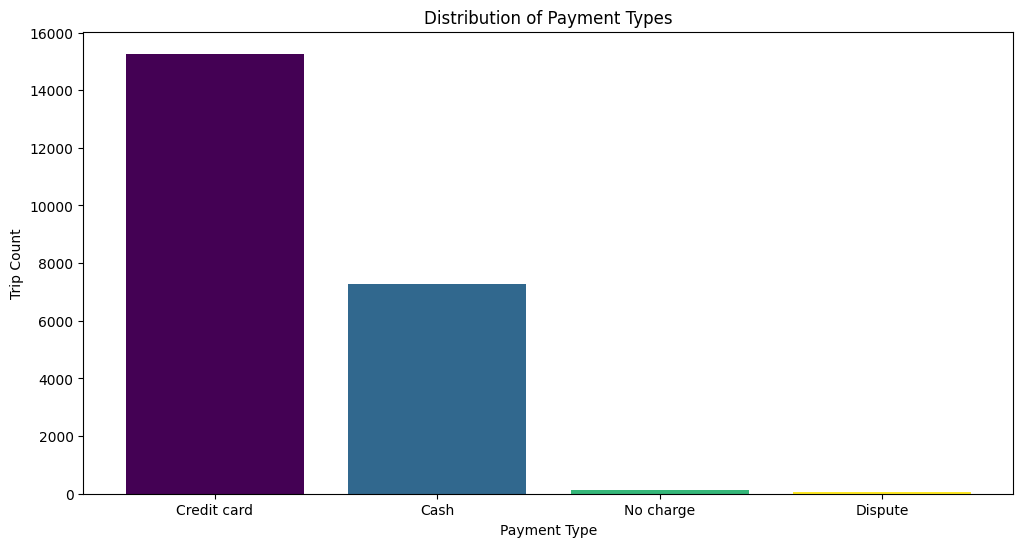

In [139]:
# Payment type mapping
payment_type_names = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

# Count of each payment type
payment_type_counts = df['payment_type'].value_counts()

# Calculate the percentage of each payment type
payment_type_percentages = (payment_type_counts / payment_type_counts.sum()) * 100

# Create a summary DataFrame
payment_type_summary = pd.DataFrame({
    'Payment Type': payment_type_counts.index.map(payment_type_names),
    'Count': payment_type_counts.values,
    'Percentage': payment_type_percentages
})

# Format the Percentage column to include a percentage sign
payment_type_summary['Percentage'] = payment_type_summary['Percentage'].apply(lambda x: f"{x:.2f}%")

# Print the summary with a heading
print("Payment Type Summary:")
print("--------------------")
print(payment_type_summary)

# Convert to DataFrame for plotting
payment_type_df = payment_type_counts.reset_index()
payment_type_df.columns = ['Payment Type', 'Trip Count']

# Map the payment type codes to names
payment_type_df['Payment Type Name'] = payment_type_df['Payment Type'].map(payment_type_names)

# Normalize the 'Payment Type' column for colormap
payment_type_df['Color Index'] = np.arange(len(payment_type_df))

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(payment_type_df['Payment Type Name'], payment_type_df['Trip Count'], 
        color=plt.cm.viridis(payment_type_df['Color Index'] / max(payment_type_df['Color Index'])))
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Trip Count')
plt.show()

---

The `payment_type` field typically uses the following codes to represent different payment methods:

- **1:** Credit Card
- **2:** Cash
- **3:** No Charge
- **4:** Dispute
- **5:** Unknown
- **6:** Voided trip

These codes are standardized in the taxi trip data and help identify how the fare was settled. 

---

The majority of transactions are paid via `credit card`, reflecting the convenience and security associated with electronic payments. `Cash` payments also represent a notable portion of the transactions. The relatively low numbers for `No Charge` and `Dispute` categories suggest that such instances are rare, which is a positive indicator of transaction integrity and customer satisfaction.

---

Rate Code Summary:
-----------------
                   Rate Code  Count Percentage
1              Standard Rate  22070     97.23%
2                        JFK    513      2.26%
5            Negotiated Fare     68      0.30%
3                     Newark     39      0.17%
4      Nassau or Westchester      8      0.04%
99  Unknown or Miscellaneous      1      0.00%


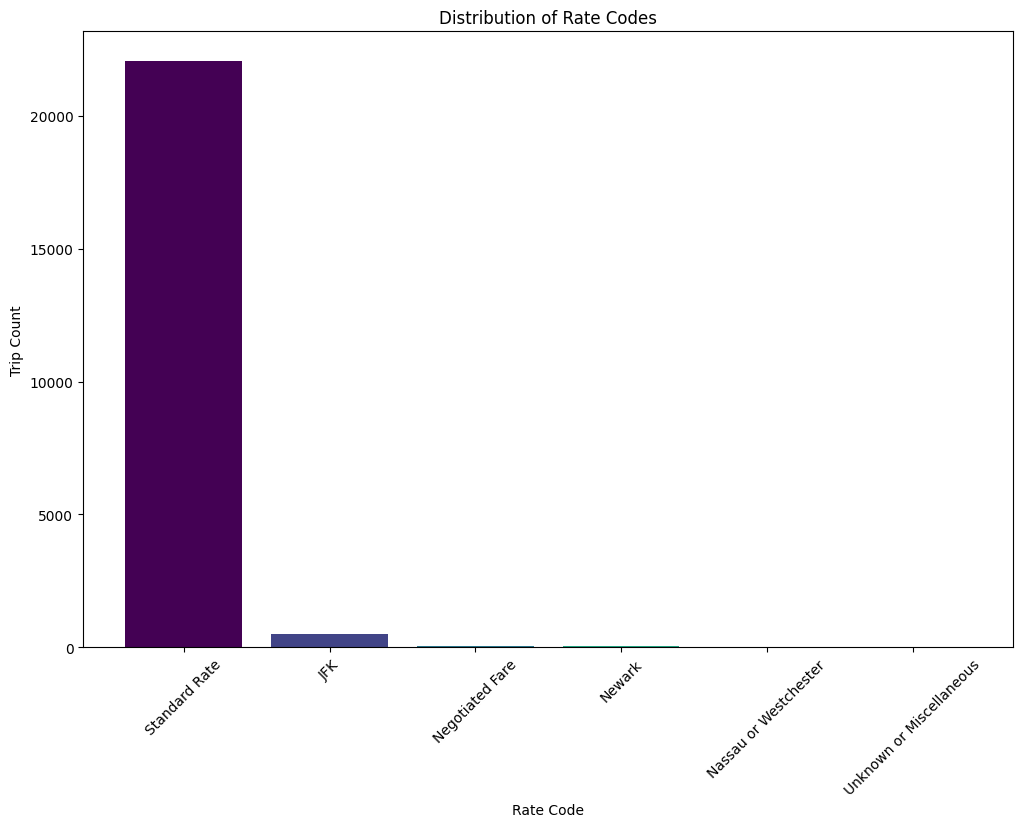

In [140]:
# Mapping RatecodeID to names
ratecode_names = {
    1: 'Standard Rate',
    2: 'JFK',
    3: 'Newark',
    4: 'Nassau or Westchester',
    5: 'Negotiated Fare',
    6: 'Group Ride',
    99: 'Unknown or Miscellaneous'
}

# Calculate the count of each RatecodeID
ratecode_counts = df['RatecodeID'].value_counts()

# Calculate the percentage of each RatecodeID
ratecode_percentages = (ratecode_counts / ratecode_counts.sum()) * 100

# Create a summary DataFrame
ratecode_summary = pd.DataFrame({
    'Rate Code': ratecode_counts.index.map(ratecode_names),
    'Count': ratecode_counts.values,
    'Percentage': ratecode_percentages
})

# Format the Percentage column to include a percentage sign
ratecode_summary['Percentage'] = ratecode_summary['Percentage'].apply(lambda x: f"{x:.2f}%")

# Add headings and underline
print("Rate Code Summary:")
print("-----------------")
print(ratecode_summary)

# Convert to DataFrame for plotting
ratecode_df = ratecode_counts.reset_index()
ratecode_df.columns = ['RatecodeID', 'Count']

# Map the RatecodeID to names
ratecode_df['Rate Code'] = ratecode_df['RatecodeID'].map(ratecode_names)

# Normalize the 'RatecodeID' column for colormap
ratecode_df['Color Index'] = np.arange(len(ratecode_df))

# Plot the results
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(ratecode_df['Color Index'] / ratecode_df['Color Index'].max())
plt.bar(ratecode_df['Rate Code'], ratecode_df['Count'], color=colors)
plt.title('Distribution of Rate Codes')
plt.xlabel('Rate Code')
plt.ylabel('Trip Count')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()

---


The information about New York City taxi fare rate codes comes from the data dictionary provided by the `Taxi & Limousine Commission (TLC)` and their company website. Here are the key rate codes for taxi fares in NYC:

- **Rate Code 1:** `Standard Rate` – This is the base fare within the city limits.
- **Rate Code 2:** `Trips to JFK Airport` – Applies for trips between Manhattan and John F. Kennedy Airport (JFK).
- **Rate Code 3:** `Trips to Newark Airport` – Used for trips to Newark-Liberty International Airport (EWR).
- **Rate Code 4:** `Out of City Rate` – Applies if the taxi goes beyond the city limit to Nassau or Westchester.
- **Rate Code 5:** `Negotiated Fare` – For trips beyond NYC on an agreed-upon flat fare.
- **Rate Code 6:** `Group Ride` – For shared rides.
- **Rate Code 99:** `Unknown or Miscellaneous` – This code is not part of the standard rate codes.

---

- The vast `majority` of trips use the `Rate Code 1: Standard Rate`, indicating that most fare calculations are based on `in-city meter rates`. This aligns with the common practice of using metered fares for city rides.

- `Rate Code 2: Trips to JFK Airport` accounts for a relatively' small percentage' of trips. This suggests that airport trips are `less frequent` than standard city trips but still represent a significant portion.

- `Rate Code 5: Agreed Flat Fare` are `quite rare`, indicating that most trips do not involve pre-agreed prices. This could reflect special arrangements or long-distance travel outside NYC.

- `Trips to Newark Airport` are `infrequent`, which aligns with the lesser number of trips compared to JFK Airport.

- `Rate Code 4: Out of City Rate` trips are very rare, reflecting the relatively small number of rides that travel beyond city limits.

- The precence of the `Rate Code 99 (Unknown or Miscellaneous)` suggests a very rare or possibly erroneous entry, indicating that it does not significantly impact the overall data.

Overall, the data shows that the standard city rate dominates the fare structure, while other rate codes are much less common. This highlights the reliance on the standard metered fare for most taxi rides within NYC.

---

In [141]:
# Calculate trip duration
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

# Convert trip_duration to minutes
df['trip_duration_minutes'] = df['trip_duration'].dt.total_seconds() / 60

# Calculate average trip duration
average_trip_duration = df['trip_duration_minutes'].mean()
print(f"Average Trip Duration: {average_trip_duration:.2f} minutes")

Average Trip Duration: 17.01 minutes


---

On average, a taxi trip in New York City lasts about `17 minutes`. This suggests a relatively moderate trip length, which could be typical for a mix of short and medium-distance trips in New York City.

---

In [142]:
# Use the'tpep_pickup_datetime' column to extract the pickup hour for each trip
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Count trips by hour
trips_by_hour = df['pickup_hour'].value_counts().sort_index()

# Convert to DataFrame
trips_by_hour_df = trips_by_hour.reset_index()
trips_by_hour_df.columns = ['Hour', 'Trip Count']

# Set 'Hour' as the index
trips_by_hour_df.set_index('Hour', inplace=True)

# Print the sorted DataFrame with a heading
print("Trips by Hour of Day:")
print("----------------------")
trips_by_hour_df

Trips by Hour of Day:
----------------------


,Trip Count
Hour,
0,737
1,525
2,386
3,287
4,235
5,235
6,499
7,857
8,1020


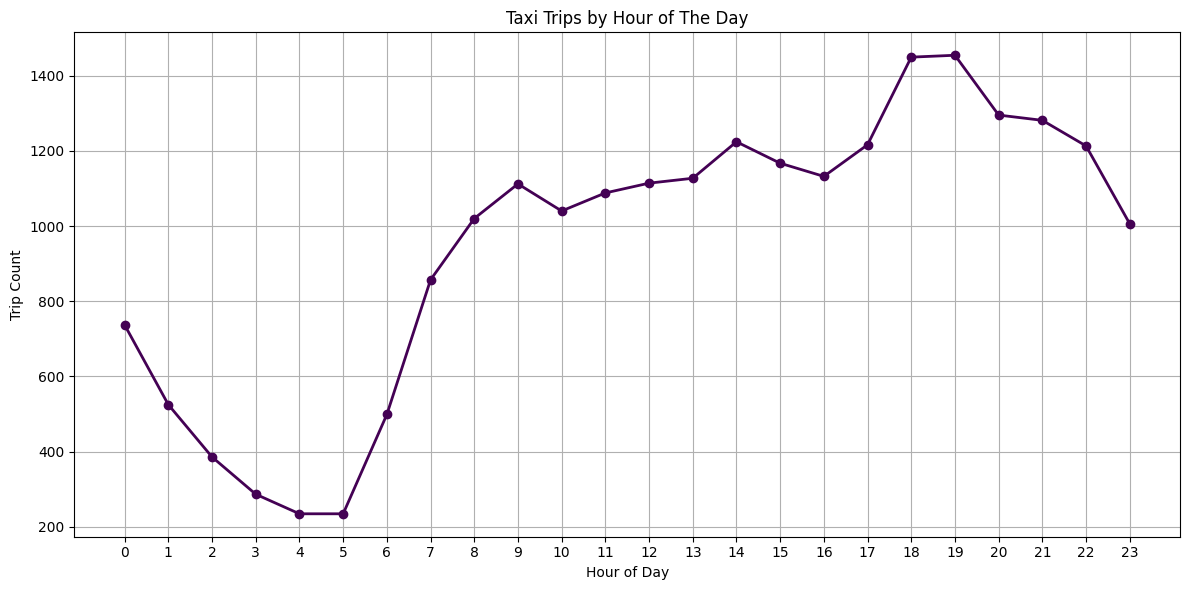

In [143]:
# Ensure the DataFrame is sorted by hour
trips_by_hour_df = trips_by_hour_df.sort_index()

# Plot the results using a line graph with viridis colormap
plt.figure(figsize=(12, 6))
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(trips_by_hour_df)))

plt.plot(trips_by_hour_df.index, trips_by_hour_df['Trip Count'], marker='o', color=colors[0], linestyle='-', linewidth=2)

plt.xlabel('Hour of Day')
plt.ylabel('Trip Count')
plt.title('Taxi Trips by Hour of The Day')
plt.xticks(range(24))  # Set x-axis ticks to cover all hours of the day
plt.grid(True)  
plt.tight_layout()
plt.show()

The graph visually represents the number of yellow taxi trips in New York City across different hours of the day. By examining the peaks and valleys in the graph, we can identify potential surge periods.

**Key Observations:**

* **Peak Demand:** The graph indicates two distinct peak periods for taxi demand:
    - **Early Morning (5 AM - 9 AM):** A sharp increase in trips suggests high demand likely associated with commuters traveling to work or school.
    - **Late Evening (4 PM - 6 PM):** A second peak occurs during the evening, possibly due to people heading home from work.

* **Surge Potential:** These peak periods are strong candidates for surge pricing as demand significantly exceeds supply. Taxi services could implement dynamic pricing to incentivize drivers to work during these busy times and ensure availability for passengers.

* **Off-Peak Hours:** The hours between approximately 12 AM and 5 AM and 9 AM to 3 PM experience significantly lower demand. These periods might be considered off-peak and could potentially have lower fares or incentives for passengers to travel during these times.

---

In [144]:
# Extract day of the week from pickup datetime
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()

# Count trips by day of the week
trips_by_day = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Convert to DataFrame for better manipulation
trips_by_day_df = trips_by_day.reset_index()
trips_by_day_df.columns = ['Day of Week', 'Trip Count']

# Sort days of the week to maintain the correct order
trips_by_day_df['Day of Week'] = pd.Categorical(trips_by_day_df['Day of Week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
trips_by_day_df = trips_by_day_df.sort_values('Day of Week')

# Print the DataFrame
print("Trips by Day of the Week:")
print("-------------------------")
trips_by_day_df

Trips by Day of the Week:
-------------------------


,Day of Week,Trip Count
0,Monday,2931
1,Tuesday,3198
2,Wednesday,3390
3,Thursday,3402
4,Friday,3413
5,Saturday,3367
6,Sunday,2998


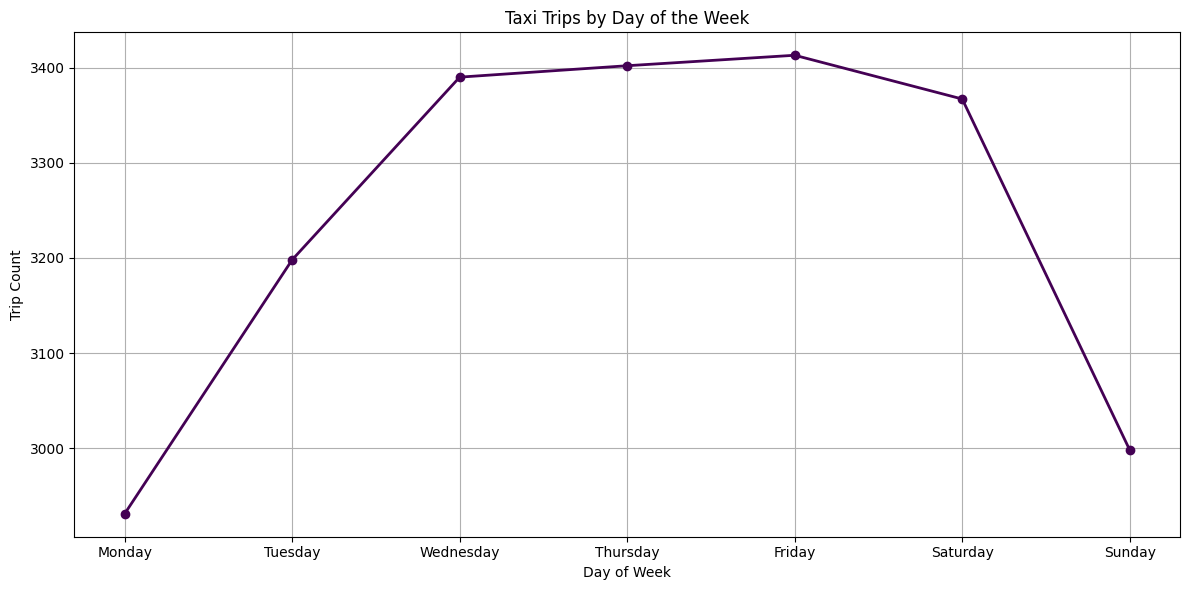

In [145]:
# Plot the results using a line graph
plt.figure(figsize=(12, 6))
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(trips_by_day_df)))

plt.plot(trips_by_day_df['Day of Week'], trips_by_day_df['Trip Count'], marker='o', color=colors[0], linestyle='-', linewidth=2)

plt.xlabel('Day of Week')
plt.ylabel('Trip Count')
plt.title('Taxi Trips by Day of the Week')
plt.grid(True)  
plt.tight_layout()
plt.show()

**Key Observations:**

- **Peak Trip Days:**
   - **Friday:** The highest number of trips occurred on Friday with 3,413 trips. This might indicate increased travel due to the start of the weekend or end-of-week activities.
   - **Thursday:** Close to Friday, Thursday also has a high trip count at 3,402 trips, suggesting a busy period before the weekend.

- **Weekday vs. Weekend:**
   - **Weekdays (Monday to Friday):** There is a generally higher number of trips during weekdays compared to weekends, with Friday having the highest count. The count increases as the week progresses, peaking on Friday.
   - **Weekends (Saturday and Sunday):** While trips on weekends are lower than weekdays, Saturday (3,367 trips) has a slightly higher count than Sunday (2,998 trips). This could be due to increased leisure activities or shopping on Saturday.

- **Lowest Trip Day:**
   - **Sunday:** Sunday has the lowest trip count at 2,998. This might reflect lower travel demand, possibly due to fewer people traveling on Sundays compared to other days.

   ---

In [146]:
# Extract month from pickup datetime
df['pickup_month'] = df['tpep_pickup_datetime'].dt.to_period('M')

# Count trips by month
trips_by_month = df['pickup_month'].value_counts().sort_index()

# Print results
print("Monthly Trip Trends:")
print("--------------------")
trips_by_month

Monthly Trip Trends:
--------------------


2017-01    1997
2017-02    1769
2017-03    2049
2017-04    2019
2017-05    2013
2017-06    1964
2017-07    1697
2017-08    1724
2017-09    1734
2017-10    2027
2017-11    1843
2017-12    1863
Freq: M, Name: pickup_month, dtype: int64

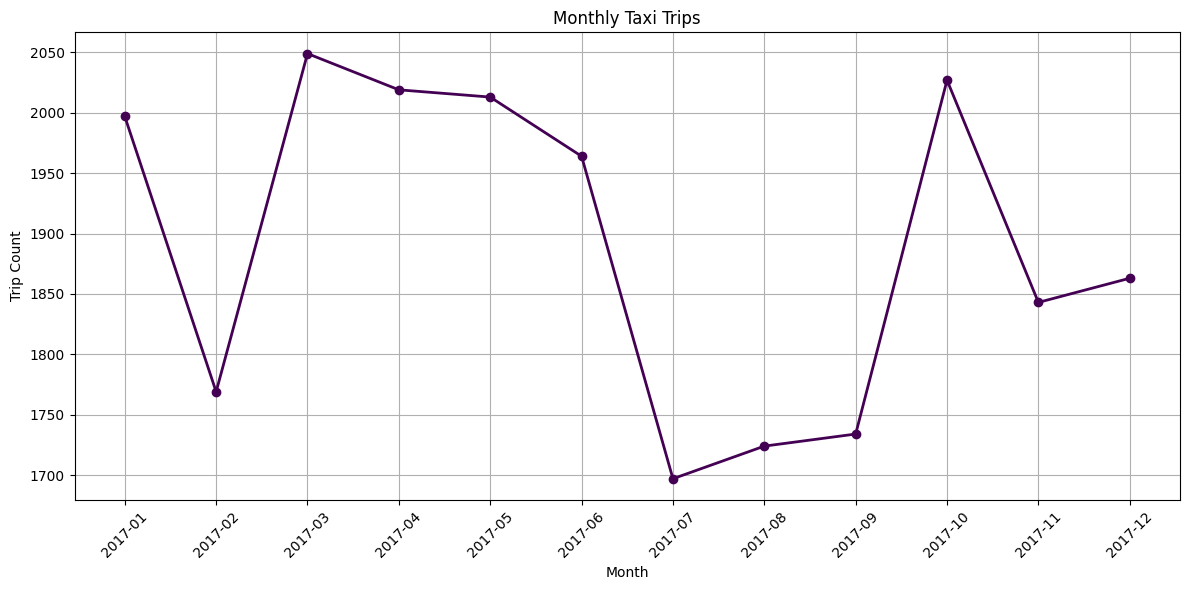

In [147]:
# Convert to DataFrame for plotting
trips_by_month_df = trips_by_month.reset_index()
trips_by_month_df.columns = ['Month', 'Trip Count']

# Plot the results using a line graph
plt.figure(figsize=(12, 6))
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(trips_by_month_df)))

plt.plot(trips_by_month_df['Month'].astype(str), trips_by_month_df['Trip Count'], marker='o', color=colors[0], linestyle='-', linewidth=2)

plt.xlabel('Month')
plt.ylabel('Trip Count')
plt.title('Monthly Taxi Trips')
plt.grid(True)  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Overall Trend:**

* The graph shows a fluctuating pattern in the number of taxi trips throughout the year 2017. There is no clear upward or downward trend.

**Key Observations:**

* **Peak Months:** January, March, and October recorded the highest number of taxi trips.
* **Low Months:** June, July and August witnessed the lowest number of taxi trips.

**Potential Factors:**
* **Seasonality:** The lower number of trips in June, July and August could be attributed to summer vacations when people might be using alternative transportation or staying indoors due to warmer weather.

---

Summary Statistics for Fare Amounts:
-------------------------------------
count    22699.000000
mean        16.310502
std         16.097295
min       -120.300000
25%          8.750000
50%         11.800000
75%         17.800000
max       1200.290000
Name: total_amount, dtype: float64


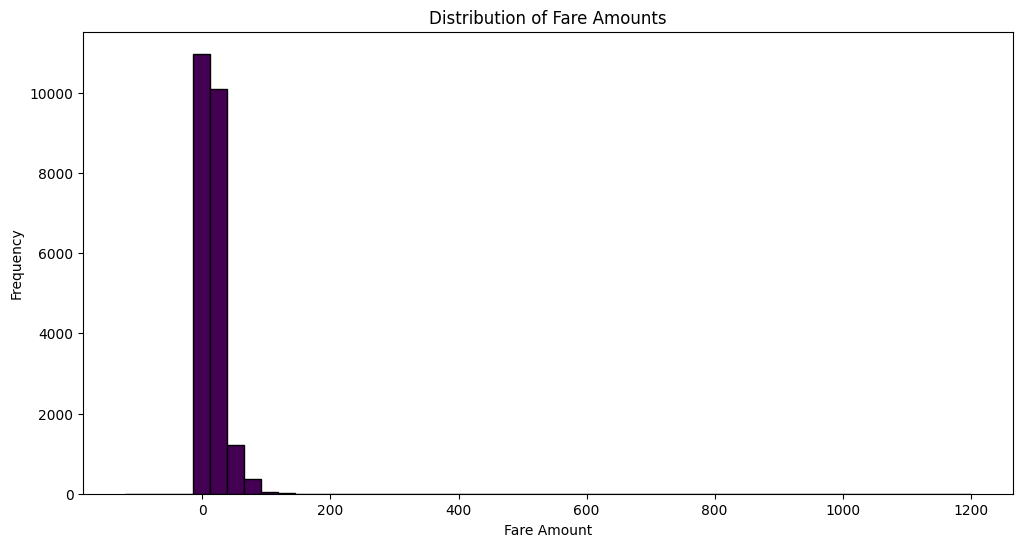

In [148]:
# Print summary statistics
print("Summary Statistics for Fare Amounts:")
print("-------------------------------------")
print(df['total_amount'].describe())

# Plot the distribution of fare amounts
plt.figure(figsize=(12, 6))
plt.hist(df['total_amount'].dropna(), bins=50, color=colors[0], edgecolor='black')
plt.title('Distribution of Fare Amounts')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

**Key Observations:**

- **Right-Skewed Distribution:** The distribution plot exhibits a clear right-skewed distribution, meaning the tail extends towards higher fare amounts. This indicates that most fares are concentrated in the lower range, with fewer instances of higher fares. Therefore, a significant portion of taxi trips are relatively short and inexpensive.

-  The average taxi trip costs around $16.31, with a moderate variation in fares.
-  A significant portion (25%) of fares are below $8.75, indicating the presence of many short or inexpensive trips.
- Half of the taxi trips have fares below $11.80, and the other half have fares above this amount. This marks the midpoint of the fare distribution.
- Approximately three-quarters (75%) of the taxi fares are below $17.80. This suggests that a majority of the trips fall within the $8.75 to $17.80 range. 
- The presence of a negative value (-$120.3) in the fare amount data is highly unusual and likely represents a data error. Negative fare amounts are not possible in a real-world scenario. Further investigation is recommended to identify and correct this error.
- The presence of outliers on both ends (negative value and very high fare) might require further investigation.

*Overall, the distribution of fare amounts suggests that a substantial portion of taxi trips are relatively short or inexpensive, with a smaller proportion of trips having significantly higher fares.*

---

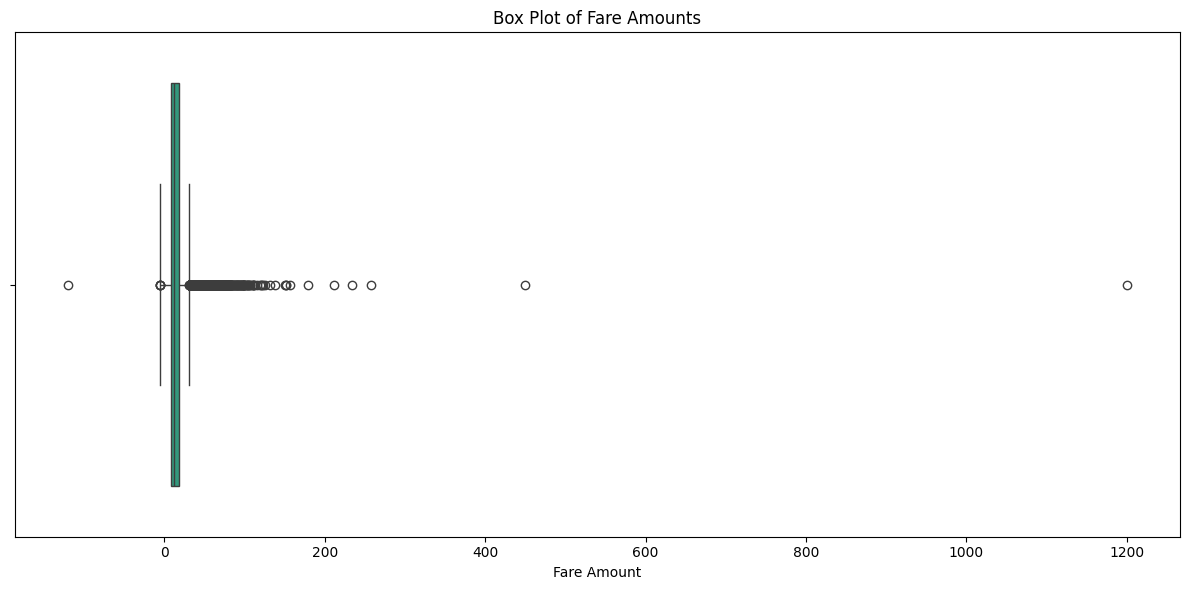

In [149]:
# Plotting the box plot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['total_amount'], color=plt.get_cmap('viridis')(0.6))

# Adding titles and labels
plt.title('Box Plot of Fare Amounts')
plt.xlabel('Fare Amount')
plt.tight_layout()
plt.show()

In [150]:

# Filter the negative values from the original dataframe
negative_outliers_df = df[df['total_amount'] < 0]

# Select relevant columns for the filtered DataFrame
filtered_negative_outliers_df = negative_outliers_df[['TripID', 'trip_distance', 'payment_type', 'total_amount', 'trip_duration_minutes']]

# Display the filtered DataFrame
filtered_negative_outliers_df

,TripID,trip_distance,payment_type,total_amount,trip_duration_minutes
314,105454287,0.12,3,-3.8,0.483333
1646,57337183,0.04,3,-3.3,1.000000
4423,97329905,0.06,4,-4.3,1.333333
5448,28459983,0.25,3,-4.3,2.000000
5758,833948,0.02,3,-3.8,0.000000
8204,91187947,0.41,3,-4.8,2.383333
10281,55302347,0.00,4,-4.3,2.000000
11204,58395501,0.64,3,-5.3,3.000000
12944,29059760,0.17,4,-120.3,1395.000000
14714,109276092,0.40,4,-5.3,3.166667


In [151]:
# Analyze payment types for negative outliers
payment_type_summary = negative_outliers_df['payment_type'].value_counts()

print("Payment Type Distribution for Negative Outliers:")
print("------------------------------------------------")
print(payment_type_summary)

Payment Type Distribution for Negative Outliers:
------------------------------------------------
3    7
4    7
Name: payment_type, dtype: int64


There are `14 entries` in the dataset with negative fare amounts. Given that the negative fare amounts are associated with payment types `3 (No Charge)` or `4 (Dispute)` and exhibit `unusual trip durations`, these records likely do not reflect actual paid fares and should be excluded from the analysis. Therefore, to focus on meaningful fare data, we should filter out entries with payment types of 3 or 4 and concentrate on those with payment types of 1 (Cash) or 2 (Credit Card), which represent actual transactions.


In [152]:
# Create a copy of the DataFrame
df_cleaned = df.copy()

# Filter out negative fare amounts
df_cleaned = df_cleaned[df_cleaned['total_amount'] >= 0]

# Display the cleaned DataFrame
df_cleaned.head()

,TripID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,RatecodeID,store_and_fwd_flag,...,mta_tax,improvement_surcharge,tip_amount,tolls_amount,total_amount,trip_duration,trip_duration_minutes,pickup_hour,day_of_week,pickup_month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,100,231,1,N,...,0.5,0.3,2.76,0.0,16.56,0 days 00:14:04,14.066667,8,Saturday,2017-03
1,35634249,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,186,43,1,N,...,0.5,0.3,4.00,0.0,20.80,0 days 00:26:00,26.000000,14,Tuesday,2017-04
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,262,236,1,N,...,0.5,0.3,1.45,0.0,8.75,0 days 00:07:12,7.200000,7,Friday,2017-12
3,38942136,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,188,97,1,N,...,0.5,0.3,6.39,0.0,27.69,0 days 00:31:00,31.000000,13,Sunday,2017-05
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,4,112,1,N,...,0.5,0.3,0.00,0.0,17.80,0 days 00:16:43,16.716667,23,Saturday,2017-04


In [153]:
# Print the number of rows before filtering
print("Number of rows before filtering:", df.shape[0])

# Print the number of rows after filtering
print("Number of rows after filtering:", df_cleaned.shape[0])

Number of rows before filtering: 22699
Number of rows after filtering: 22685


The negative values have been dropped from the dataset.

---

In [154]:
# Calculate summary statistics
Q1 = df_cleaned['total_amount'].quantile(0.25)
Q3 = df_cleaned['total_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify high-value outliers
outliers_df = df_cleaned[(df_cleaned['total_amount'] > upper_bound)]

# Print the outlier DataFrame
print("DataFrame Containing Outliers:")
print("------------------------------")
outliers_df

DataFrame Containing Outliers:
------------------------------


,TripID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,RatecodeID,store_and_fwd_flag,...,mta_tax,improvement_surcharge,tip_amount,tolls_amount,total_amount,trip_duration,trip_duration_minutes,pickup_hour,day_of_week,pickup_month
6,37660487,2,2017-05-03 19:04:00,2017-05-03 20:03:00,1,12.83,79,241,1,N,...,0.5,0.3,9.86,0.00,59.16,0 days 00:59:00,59.000000,19,Wednesday,2017-05
11,18600059,2,2017-03-05 19:15:00,2017-03-05 19:52:00,2,18.90,236,132,2,N,...,0.5,0.3,14.58,5.54,72.92,0 days 00:37:00,37.000000,19,Sunday,2017-03
21,85505540,2,2017-10-11 12:34:00,2017-10-11 13:22:00,1,12.30,138,265,5,N,...,0.0,0.3,12.00,16.26,96.81,0 days 00:48:00,48.000000,12,Wednesday,2017-10
29,94052446,2,2017-11-06 20:30:00,2017-11-07 00:00:00,1,30.83,132,23,1,N,...,0.5,0.3,18.56,11.52,111.38,0 days 03:30:00,210.000000,20,Monday,2017-11
32,63600506,2,2017-07-26 23:26:50,2017-07-26 23:55:49,1,14.32,132,149,1,N,...,0.5,0.3,0.00,0.00,41.80,0 days 00:28:59,28.983333,23,Wednesday,2017-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22665,63522017,2,2017-07-26 19:52:51,2017-07-26 20:15:50,1,7.98,261,14,1,N,...,0.5,0.3,5.36,0.00,32.16,0 days 00:22:59,22.983333,19,Wednesday,2017-07
22668,14034918,2,2017-02-22 06:45:04,2017-02-22 07:19:34,5,25.30,181,132,1,N,...,0.5,0.3,17.08,0.00,87.33,0 days 00:34:30,34.500000,6,Wednesday,2017-02
22676,105938763,2,2017-12-14 12:21:01,2017-12-14 12:56:21,1,9.47,138,263,1,N,...,0.5,0.3,6.00,5.76,44.56,0 days 00:35:20,35.333333,12,Thursday,2017-12
22686,9039930,2,2017-02-08 18:13:00,2017-02-08 19:34:00,5,10.64,170,70,1,N,...,0.5,0.3,14.84,5.54,74.18,0 days 01:21:00,81.000000,18,Wednesday,2017-02


In [155]:
# Print a summary of the outliers
print("\nSummary of Outliers:")
print("---------------------")
outliers_df.describe()


Summary of Outliers:
---------------------


,TripID,VendorID,passenger_count,trip_distance,PULocationID,DOLocationID,RatecodeID,payment_type,fare_amount,extra,mta_tax,improvement_surcharge,tip_amount,tolls_amount,total_amount,trip_duration,trip_duration_minutes,pickup_hour
count,2.156000e+03,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156,2156.000000,2156.000000
mean,5.790289e+07,1.557514,1.669295,12.015176,151.683210,147.847866,1.416048,1.238868,41.277894,0.452226,0.484694,0.299861,6.286934,3.155733,51.977449,0 days 00:40:02.326066790,40.038768,13.861317
std,3.255572e+07,0.496796,1.290193,5.182449,54.217139,71.602674,2.231581,0.455939,26.651534,0.959524,0.086152,0.006461,6.554571,3.295669,31.586873,0 days 00:50:42.429027879,50.707150,6.227010
min,7.590000e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.400000,0 days 00:00:00,0.000000,0.000000
25%,3.076803e+07,1.000000,1.000000,8.700000,132.000000,99.250000,1.000000,1.000000,30.500000,0.000000,0.500000,0.300000,0.000000,0.000000,38.277500,0 days 00:27:26.750000,27.445833,10.000000
50%,5.768810e+07,2.000000,1.000000,10.770000,138.000000,138.000000,1.000000,1.000000,37.000000,0.000000,0.500000,0.300000,6.450000,5.540000,47.155000,0 days 00:35:12.500000,35.208333,15.000000
75%,8.666398e+07,2.000000,2.000000,16.400000,170.000000,220.000000,2.000000,1.000000,52.000000,0.500000,0.500000,0.300000,9.400000,5.760000,61.552500,0 days 00:46:31.750000,46.529167,19.000000
max,1.134391e+08,2.000000,6.000000,33.960000,265.000000,265.000000,99.000000,4.000000,999.990000,4.500000,0.500000,0.300000,200.000000,19.100000,1200.290000,0 days 23:57:50,1437.833333,23.000000


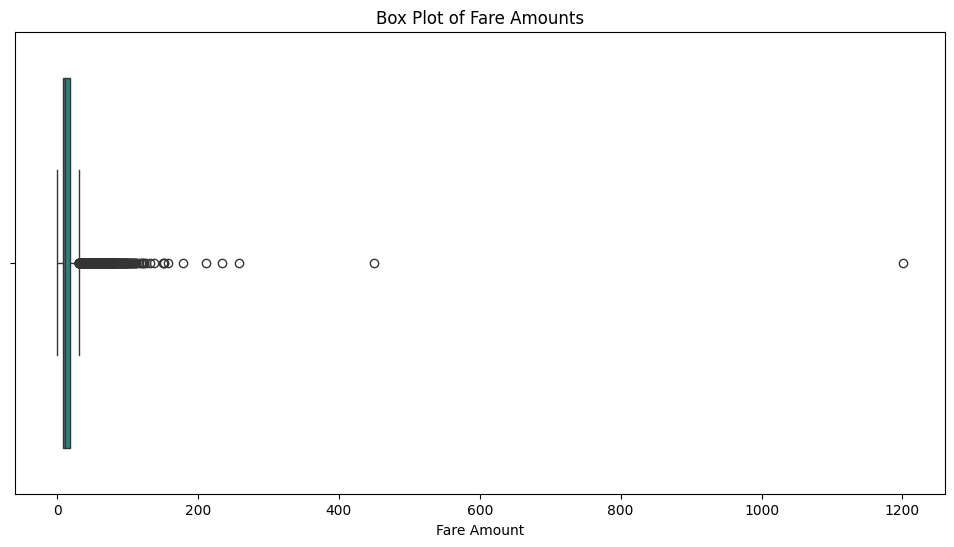

In [156]:
# Create a colormap instance
cmap = plt.get_cmap('viridis')

# Define a color from the colormap
color = cmap(0.5)  # You can adjust the parameter to get a different shade

# Visualize the outliers using the viridis colormap
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cleaned['total_amount'], color=color)
plt.title('Box Plot of Fare Amounts')
plt.xlabel('Fare Amount')
plt.show()

We can see 5 ouliers beyond the $200 fare amount. Let's explore the top 10 outliers by fare amount.

In [157]:
# Sort the outliers by total_amount in descending order
sorted_outliers_df = outliers_df.sort_values(by='total_amount', ascending=False)

# Select the top 10 outliers
top_10_outliers_df = sorted_outliers_df.head(10)

# Print the TripID and total_amount for the top 10 outliers
print("Top 10 Outliers by Total Amount:")
print("---------------------------------")
top_10_outliers_df[['TripID', 'trip_distance', 'payment_type', 'total_amount', 'trip_duration_minutes']]

Top 10 Outliers by Total Amount:
---------------------------------


,TripID,trip_distance,payment_type,total_amount,trip_duration_minutes
8476,11157412,2.60,1,1200.29,1.000000
20312,107558404,0.00,2,450.30,0.150000
13861,40523668,33.92,1,258.21,60.150000
12511,107108848,0.00,1,233.74,0.300000
15474,55538852,0.00,1,211.80,0.000000
6064,49894023,32.72,1,179.06,67.483333
16379,101198443,25.50,2,157.06,50.566667
3582,111653084,7.30,1,152.30,0.000000
11269,51920669,0.00,1,151.82,0.916667
9280,51810714,33.96,2,150.30,39.216667


In [158]:
# Print the DataFrame with top 10 outliers
print("Top 10 Outliers by Total Amount:")
print("---------------------------------")
top_10_outliers_df

Top 10 Outliers by Total Amount:
---------------------------------


,TripID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,RatecodeID,store_and_fwd_flag,...,mta_tax,improvement_surcharge,tip_amount,tolls_amount,total_amount,trip_duration,trip_duration_minutes,pickup_hour,day_of_week,pickup_month
8476,11157412,1,2017-02-06 05:50:00,2017-02-06 05:51:00,1,2.60,226,226,5,N,...,0.0,0.3,200.00,0.00,1200.29,0 days 00:01:00,1.000000,5,Monday,2017-02
20312,107558404,2,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.00,265,265,5,N,...,0.0,0.3,0.00,0.00,450.30,0 days 00:00:09,0.150000,9,Tuesday,2017-12
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,229,265,5,N,...,0.5,0.3,51.64,5.76,258.21,0 days 01:00:09,60.150000,8,Friday,2017-05
12511,107108848,2,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.00,265,265,5,N,...,0.0,0.3,46.69,11.75,233.74,0 days 00:00:18,0.300000,18,Sunday,2017-12
15474,55538852,2,2017-06-06 20:55:00,2017-06-06 20:55:00,1,0.00,265,265,5,N,...,0.5,0.3,11.00,0.00,211.80,0 days 00:00:00,0.000000,20,Tuesday,2017-06
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,138,1,3,N,...,0.0,0.3,55.50,16.26,179.06,0 days 01:07:29,67.483333,12,Tuesday,2017-06
16379,101198443,2,2017-11-30 10:41:11,2017-11-30 11:31:45,1,25.50,132,265,5,N,...,0.5,0.3,0.00,16.26,157.06,0 days 00:50:34,50.566667,10,Thursday,2017-11
3582,111653084,1,2017-01-01 23:53:00,2017-01-01 23:53:00,1,7.30,1,1,5,N,...,0.0,0.3,0.00,0.00,152.30,0 days 00:00:00,0.000000,23,Sunday,2017-01
11269,51920669,1,2017-06-19 00:51:17,2017-06-19 00:52:12,2,0.00,265,265,5,N,...,0.0,0.3,20.00,11.52,151.82,0 days 00:00:55,0.916667,0,Monday,2017-06
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,132,265,5,N,...,0.0,0.3,0.00,0.00,150.30,0 days 00:39:13,39.216667,23,Sunday,2017-06


Transactions with extraordinarily high fare amounts but very short trip durations may indicate errors or anomalies in the data. For example:
- A fare amount of 1200.29 USD for a trip that lasts just one minute is highly unusual and likely indicates a data entry mistake or an issue with the recording of trip details. 
- Similarly, a  fare of 450.30 USD for a trip duration of only 9 seconds is also extremely unusual. Such a short duration does not align with the fare amount, suggesting potential errors in data recording or exceptional cases that are not typical.

For this reason, we will exclude the first two transactions which are above $450.

---

In [159]:
# Define thresholds for exclusion
amount_threshold = 450 

# Exclude outliers based on the thresholds
df_filtered = df_cleaned[
    ~((df_cleaned['total_amount'] > amount_threshold)) & ((df_cleaned['trip_duration_minutes'] >= 0))

]

# Print the updated DataFrame shape and a few rows for verification
print("Shape of DataFrame after excluding certain outliers:", df_filtered.shape)
df_filtered.head()

Shape of DataFrame after excluding certain outliers: (22682, 23)


,TripID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,RatecodeID,store_and_fwd_flag,...,mta_tax,improvement_surcharge,tip_amount,tolls_amount,total_amount,trip_duration,trip_duration_minutes,pickup_hour,day_of_week,pickup_month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,100,231,1,N,...,0.5,0.3,2.76,0.0,16.56,0 days 00:14:04,14.066667,8,Saturday,2017-03
1,35634249,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,186,43,1,N,...,0.5,0.3,4.00,0.0,20.80,0 days 00:26:00,26.000000,14,Tuesday,2017-04
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,262,236,1,N,...,0.5,0.3,1.45,0.0,8.75,0 days 00:07:12,7.200000,7,Friday,2017-12
3,38942136,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,188,97,1,N,...,0.5,0.3,6.39,0.0,27.69,0 days 00:31:00,31.000000,13,Sunday,2017-05
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,4,112,1,N,...,0.5,0.3,0.00,0.0,17.80,0 days 00:16:43,16.716667,23,Saturday,2017-04


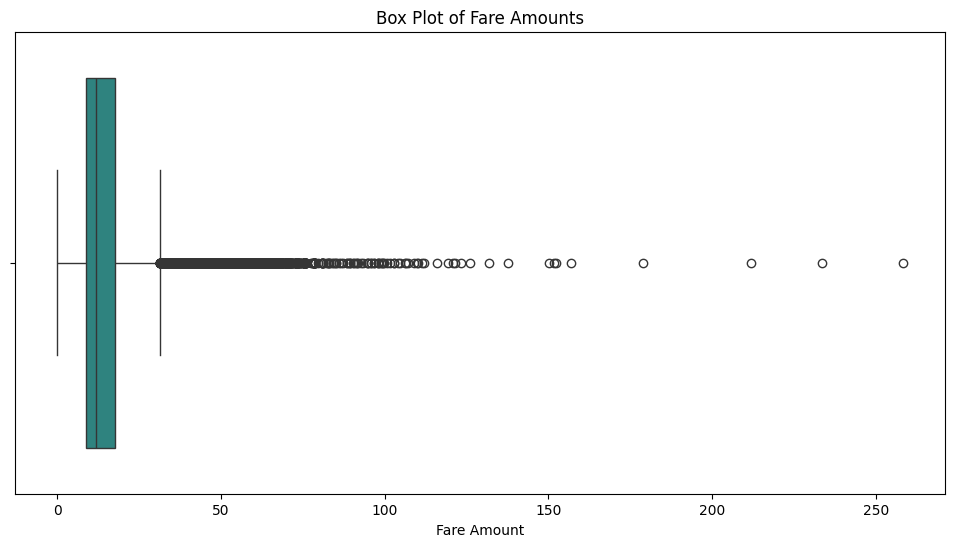

In [160]:
# Create a colormap instance
cmap = plt.get_cmap('viridis')

# Define a color from the colormap
color = cmap(0.5)

# Visualize the outliers 
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filtered['total_amount'], color=color)
plt.title('Box Plot of Fare Amounts')
plt.xlabel('Fare Amount')
plt.show()

The very high fare amounts have been successfully excluded from the dataset.

---

count    22682.000000
mean         1.828340
std          2.472972
min          0.000000
25%          0.000000
50%          1.350000
75%          2.450000
max         55.500000
Name: tip_amount, dtype: float64


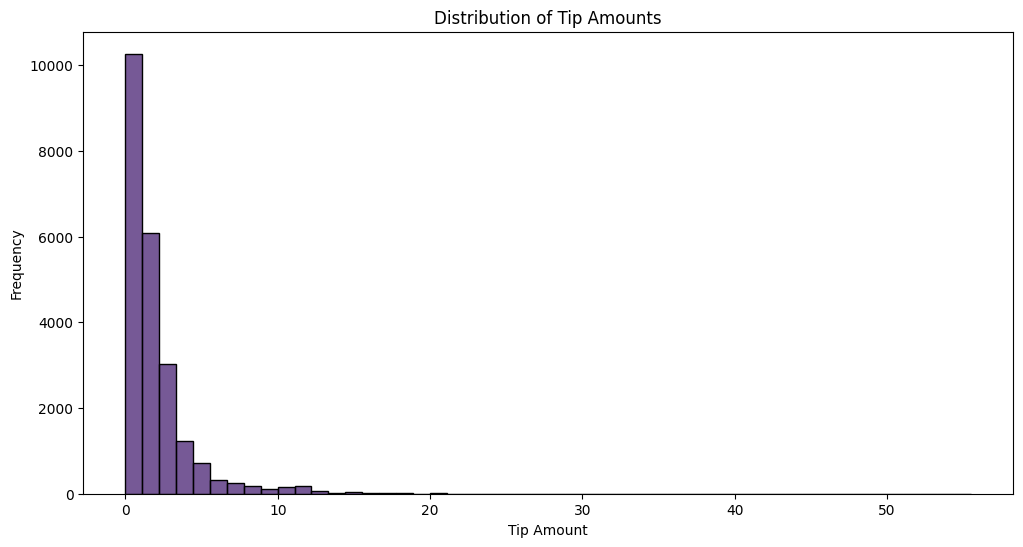

In [161]:
# Summary statistics for tip_amount
print(df_filtered['tip_amount'].describe())

# Plot the distribution of tip_amount
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['tip_amount'], bins=50, color=colors[1],edgecolor='black')
plt.title('Distribution of Tip Amounts')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.show()

The distribution plot exhibits a clear right-skewed distribution. This indicates that the majority of tips are relatively small, with a few significantly larger tips. 

---

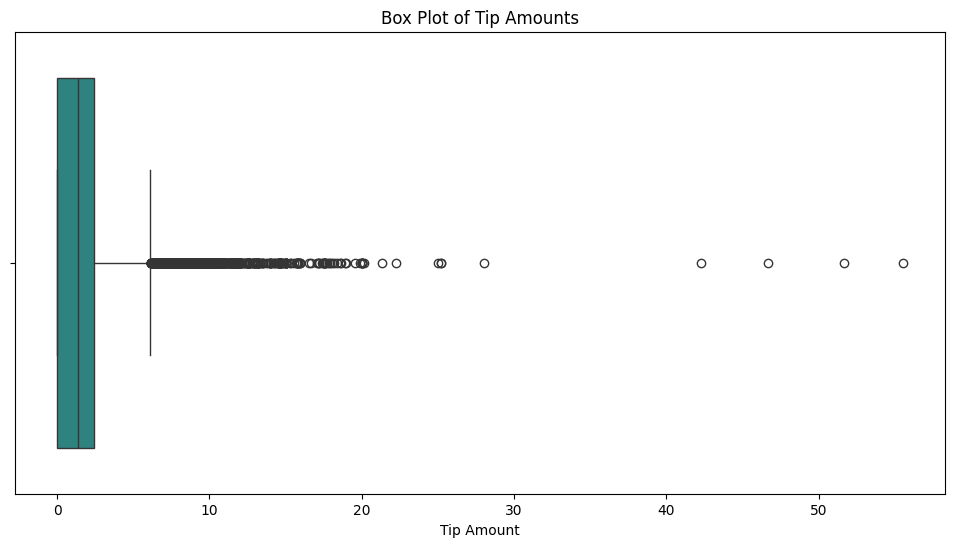

In [162]:
# Visualize the outliers 
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filtered['tip_amount'], color=color)
plt.title('Box Plot of Tip Amounts')
plt.xlabel('Tip Amount')
plt.show()

The box plot confirms our earlier observation on the tip amounts. It reveals several outliers, represented by individual data points beyond the whiskers. These outliers suggest that there are a small number of exceptionally high tips, which could be due to various factors such as exceptional service, large bills, or other unique circumstances.

* The data suggests that tipping behavior is concentrated in the lower range, with a few instances of very generous tips.

---


In [163]:
# Calculate the average tip amount
average_tip_amount = df_filtered['tip_amount'].mean()
print(f"Average Tip Amount: ${average_tip_amount:.2f}")

Average Tip Amount: $1.83


On average, passengers are tipping around $1.83 per ride.

---

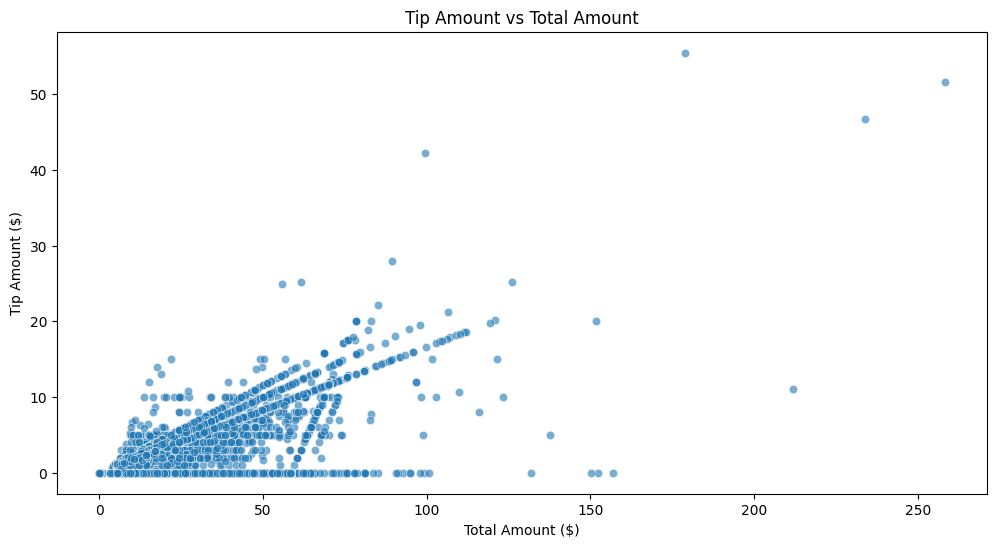

In [164]:
# Scatter plot to explore the relationship between tip amount and total amount
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='total_amount', y='tip_amount', alpha=0.6)
plt.title('Tip Amount vs Total Amount')
plt.xlabel('Total Amount ($)')
plt.ylabel('Tip Amount ($)')
plt.show()

- There appears to be a positive correlation between the tip amount and the total amount. This suggests that as the total amount of the fare increases, the tip amount tends to increase as well.

- The data points are clustered along a diagonal line, further supporting the positive correlation. However, there's a significant amount of scatter around this line, indicating that other factors besides the total amount might influence the tip amount.

- A few outliers can be observed in the upper right corner of the plot. These represent cases where the tip amount is significantly higher than what would be expected based on the total amount. These could be attributed to exceptional service, large groups, or other unique circumstances.

- The density of data points is higher in the lower left corner of the plot, indicating that a majority of the transactions involve lower total amounts and smaller tip amounts.

---

Average Tip Amounts by Payment Type:
  payment_type  tip_amount
0  Credit Card    2.716876
1         Cash    0.000000
2    No Charge    0.000000
3      Dispute    0.000000


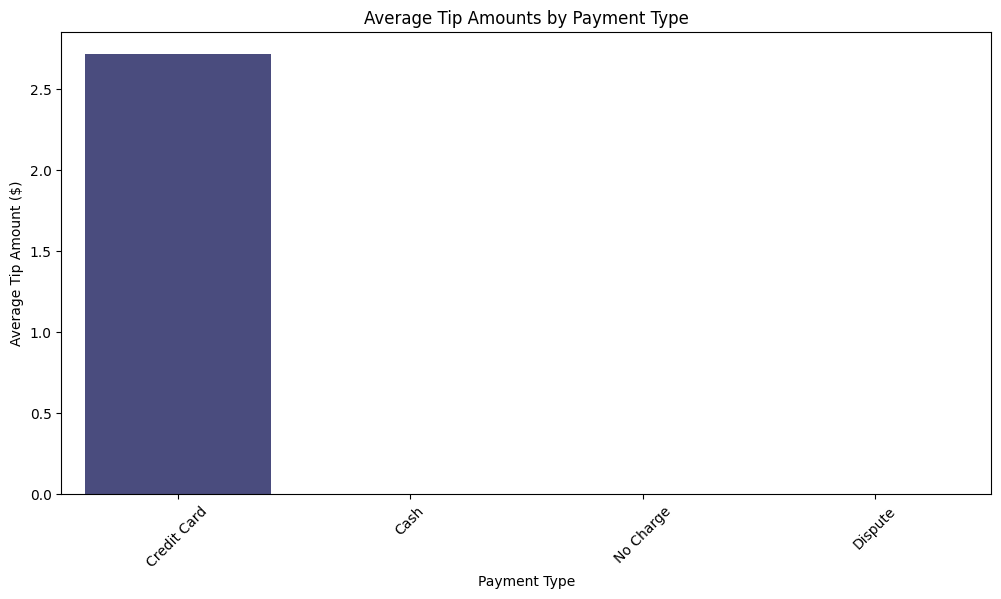

In [165]:
# Calculate average tip amount by payment type
average_tips_by_payment_type = df_filtered.groupby('payment_type')['tip_amount'].mean().reset_index()

# Map payment_type codes to readable names (if needed)
payment_type_names = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}
average_tips_by_payment_type['payment_type'] = average_tips_by_payment_type['payment_type'].map(payment_type_names)

# Print average tip amounts by payment type
print("Average Tip Amounts by Payment Type:")
print(average_tips_by_payment_type)

# Create a bar plot for average tip amounts by payment type
plt.figure(figsize=(12, 6))
sns.barplot(data=average_tips_by_payment_type, x='payment_type', y='tip_amount', palette='viridis')
plt.title('Average Tip Amounts by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Tip Amount ($)')
plt.xticks(rotation=45)
plt.show()

- The average tip amount for credit card payments is significantly higher at $2.72. This suggests that credit card users tend to tip more frequently or more generously compared to other payment methods.

- The average tip amount for cash, no charge, and dispute payments is $0.00. This likely indicates that tips are either not recorded or not applicable for these payment types. For instance:
   - **Cash**: Tips might not be consistently recorded or reported.
   - **No Charge**: These rides might be complimentary or sponsored, resulting in no tip.
   - **Dispute**: Transactions under dispute might not include tips or may not be fully processed.

This analysis highlights that credit card payments are the primary source of tips, suggesting that enhancing the tipping experience for cash payments or exploring why tips are not recorded for other payment types might be areas for further investigation.

---

Average Tip Amount by Hour of the Day:
    pickup_hour  tip_amount
0             0    1.837143
1             1    1.606813
2             2    1.727117
3             3    1.642230
4             4    1.704213
5             5    2.082179
6             6    1.826774
7             7    1.793727
8             8    1.874824
9             9    1.792943
10           10    1.691596
11           11    1.877608
12           12    1.721159
13           13    1.710302
14           14    1.803766
15           15    1.763842
16           16    1.859717
17           17    1.831358
18           18    1.994934
19           19    1.761273
20           20    1.869567
21           21    1.950086
22           22    2.003931
23           23    1.863479


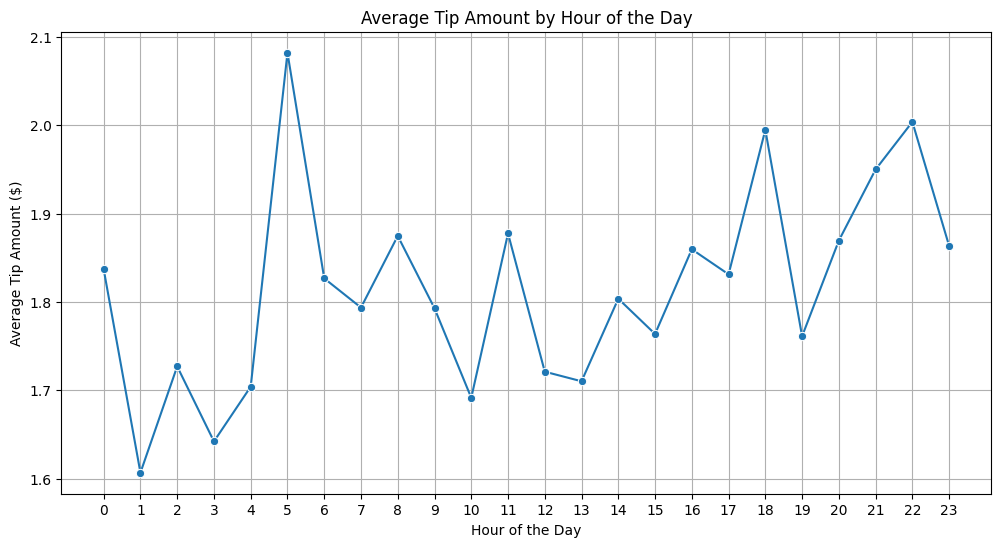

In [166]:
# Extract hour and month from pickup datetime
df_filtered['pickup_hour'] = df_filtered['tpep_pickup_datetime'].dt.hour
df_filtered['pickup_month'] = df_filtered['tpep_pickup_datetime'].dt.month

# Calculate and print average tip amount by hour of the day
hourly_tip_avg = df_filtered.groupby('pickup_hour')['tip_amount'].mean().reset_index()
print("Average Tip Amount by Hour of the Day:")
print(hourly_tip_avg)

# Average tip amount by hour of the day
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered.groupby('pickup_hour')['tip_amount'].mean().reset_index(), x='pickup_hour', y='tip_amount', marker='o')
plt.title('Average Tip Amount by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tip Amount ($)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

- The highest average tip amount is observed between **05:00 - 06:00** hours ($2.08), the **18:00 and 19:00** hours ($1.99) and **22:00 - 23:00** hrs ($2.00). This suggests that passengers tend to give higher tips during the early morning hours, late night, and evening hours.

- **Early Morning Low**: The lowest average tip amount is observed between **12:00 and 1:00** hours ($1.61). This could indicate lower tipping behavior during late-night hours when there might be fewer rides or different passenger demographics.

- **Midday Stability**: The average tip amount shows relatively stable values throughout the midday hours (around $1.70 - $1.88). There are no significant fluctuations during this period.

- **Morning to Afternoon Increase**: The tip amount slightly increases during the morning hours up to the early afternoon, before peaking around **16:00 to 17:00** ($1.86) before dropping again.

These patterns could be influenced by factors such as passenger demographics, types of trips during different hours, or the volume of taxi rides. Understanding these trends helps in tailoring taxi services and improving driver earnings based on time-of-day patterns.

---

Average Tip Amount by Month:
 pickup_month  tip_amount
            1    1.791007
            2    1.823588
            3    1.811021
            4    1.782013
            5    1.944801
            6    1.839964
            7    1.658684
            8    1.714292
            9    1.807986
           10    1.849669
           11    1.981179
           12    1.908742


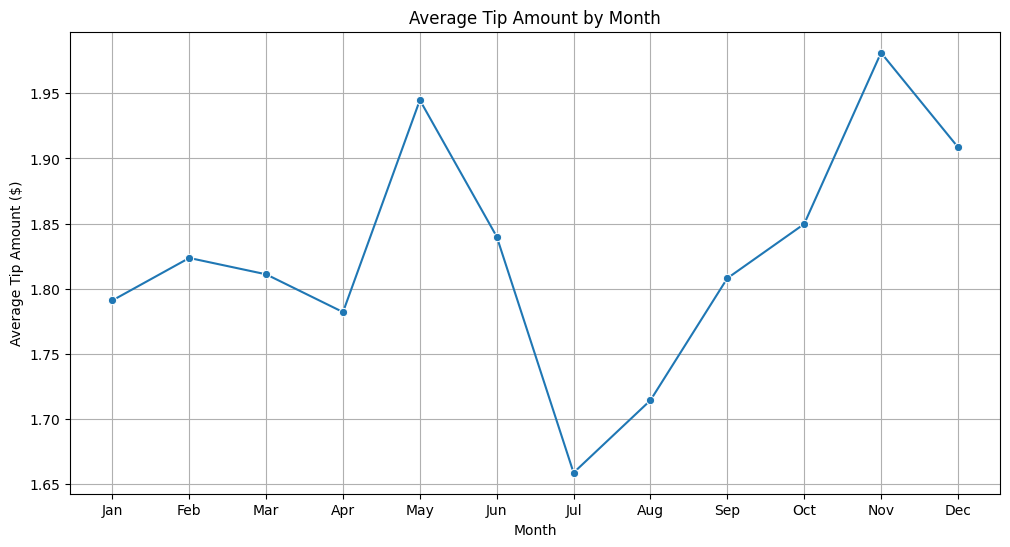

In [167]:
# Calculate and print average tip amount by month
monthly_tip_avg = df_filtered.groupby('pickup_month')['tip_amount'].mean().reset_index()
print("Average Tip Amount by Month:")
print(monthly_tip_avg.to_string(index=False))


# Average tip amount by month
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered.groupby('pickup_month')['tip_amount'].mean().reset_index(), x='pickup_month', y='tip_amount', marker='o')
plt.title('Average Tip Amount by Month')
plt.xlabel('Month')
plt.ylabel('Average Tip Amount ($)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

- **Peak Tip Amounts**:
   - The highest average tip amount is observed in **November** ($1.98) and **May** ($1.94). This suggests that passengers tend to be more generous in their tipping during these months.

- **Lowest Tip Amounts**:
   - The lowest average tip amount is recorded in **July** ($1.66). This indicates that tipping tends to be less generous during the summer months compared to other times of the year.

- **Seasonal Trends**:
   - **Spring (March - May)** and **Late Fall (October - November)** months show relatively higher average tip amounts. This may be related to increased travel or events during these times, leading to higher tips.
   - **Summer (June - August)** shows lower average tip amounts compared to other seasons, with July being the lowest. This could reflect changes in passenger demographics or travel behavior during the summer.

- **Consistency Across Months**:
   - The average tip amounts remain relatively stable throughout most of the year, with only slight variations. This indicates a general consistency in tipping behavior, although notable peaks and troughs do occur.

---

Average Tip Amount by Passenger Count:
--------------------------------------
   passenger_count  tip_amount
0                0    2.135758
1                1    1.837880
2                2    1.858065
3                3    1.716768
4                4    1.530264
5                5    1.874825
6                6    1.722746


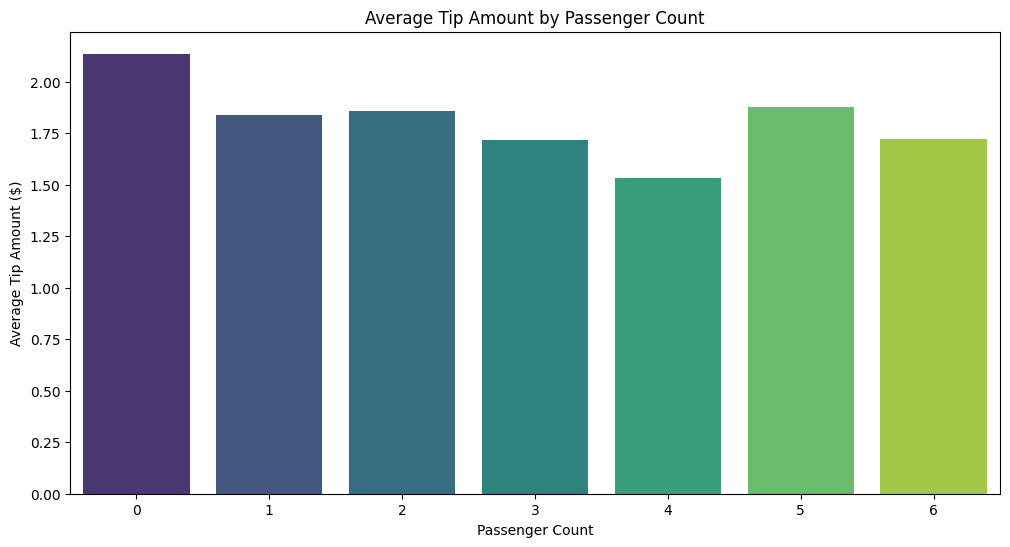

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average tip amount by passenger count
avg_tip_by_passenger_count = df_filtered.groupby('passenger_count')['tip_amount'].mean().reset_index()

# Print the average tip amount by passenger count
print("Average Tip Amount by Passenger Count:")
print('--------------------------------------')
print(avg_tip_by_passenger_count)

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_tip_by_passenger_count, x='passenger_count', y='tip_amount', palette='viridis')
plt.title('Average Tip Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Amount ($)')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()

- **Higher Tips for Fewer Passengers**: 
   - **Passenger Count 0**: The highest average tip amount is for trips with no recorded passengers ($2.14). This could indicate that these trips are either single-person rides or rides where passenger data is not properly recorded, but they tend to receive higher tips.
   - **Passenger Count 1**: Trips with one passenger have a slightly lower average tip amount ($1.84) compared to those with no recorded passengers but still above average.

- **Decrease in Tips with More Passengers**:
   - **Passenger Count 4**: The average tip amount drops to the lowest ($1.53) for trips with four passengers. This suggests that larger groups might either be less generous or have different tipping patterns compared to smaller groups.
   - **Passenger Count 3**: Trips with three passengers also show a noticeable decrease in tip amounts ($1.72), indicating a general trend where more passengers correlate with lower average tips.

- **Increased Tips for Very Small Groups**:
   - **Passenger Count 5**: Interestingly, the average tip amount increases again for trips with five passengers ($1.87), which might suggest that larger parties, despite possibly having more passengers, might be more likely to give larger tips, possibly due to more service or satisfaction.

---

Tips are highest for trips with no recorded passengers and decrease as the number of passengers increases up to four. Beyond that, the average tip amount slightly increases again for five passengers. This pattern suggests a tipping behavior where smaller groups may tip more generously, while larger groups tend to tip less, possibly due to cost-sharing or different expectations.

---

In [169]:
# Sorting data by trip distance / Top 5 longest trips by distance
sorted_df = df.sort_values(by = 'trip_distance', ascending = False)
display(sorted_df.head())

,TripID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,RatecodeID,store_and_fwd_flag,...,mta_tax,improvement_surcharge,tip_amount,tolls_amount,total_amount,trip_duration,trip_duration_minutes,pickup_hour,day_of_week,pickup_month
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,132,265,5,N,...,0.0,0.3,0.00,0.00,150.30,0 days 00:39:13,39.216667,23,Sunday,2017-06
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,229,265,5,N,...,0.5,0.3,51.64,5.76,258.21,0 days 01:00:09,60.150000,8,Friday,2017-05
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,138,1,3,N,...,0.0,0.3,55.50,16.26,179.06,0 days 01:07:29,67.483333,12,Tuesday,2017-06
10291,76319330,2,2017-09-11 11:41:00,2017-09-11 12:18:00,1,31.95,138,265,4,N,...,0.5,0.3,0.00,0.00,131.80,0 days 00:37:00,37.000000,11,Monday,2017-09
29,94052446,2,2017-11-06 20:30:00,2017-11-07 00:00:00,1,30.83,132,23,1,N,...,0.5,0.3,18.56,11.52,111.38,0 days 03:30:00,210.000000,20,Monday,2017-11


- The longest trips in the dataset are around 30-34 miles.
   - These trips are significantly longer than average taxi rides, which tend to be much shorter.

 - The fare amounts for these long trips are notably high, reflecting the substantial distance covered. This is consistent with the expectation that longer trips incur higher fares.
   - The highest fare recorded is $200.01, which suggests that very long trips can significantly increase the fare amount.

- There is variability in tip amounts among these long trips. For example, Trip 13861 has a substantial tip of $51.64, while Trips 9280 and 10291 have no tip.
   - This variability indicates that tipping behavior may not be directly proportional to trip distance but could depend on other factors such as service quality or passenger preferences.

- The total amount charged includes the fare, any extras, taxes, and tips. The highest total amount is $258.21, indicating that passengers can end up paying significantly more for very long trips.

- All these trips are paid for using either credit card or cash, which is typical for the dataset. No disputes or voided transactions are present among these long trips.

- The rate codes vary, with codes indicating standard rates or negotiated fares. For instance, Trip 13861 has a rate code of 5 (negotiated fare), which might imply special arrangements or pre-agreed rates for such long-distance trips.

- The trips span different times of the day and various days of the week. This diversity in timing can provide insights into how time of day or day of the week might affect trip length and fare.

---

# Conclusion

---

The comprehensive exploratory data analysis of the 2017 Yellow Taxi Trip Data has provided valuable insights into the factors influencing taxi fares and tipping behaviors. By incorporating time-of-day, seasonal variations, passenger count, and trip distance into the fare prediction model, the TLC can enhance the accuracy of fare estimates and improve the transparency of taxi operations. 

Our findings suggest that fare models should be adapted to reflect peak times, seasonal trends, and passenger-related factors to better align with observed patterns. Implementing these recommendations will not only optimize fare calculations but also contribute to operational efficiencies and enhanced customer experiences. Leveraging data-driven insights will enable the TLC to make informed decisions and drive improvements in New York City's taxi services.

---